# Visualizing Temperatures of NYC during The 19th Century
This is part of [Applied Plotting, Charting & Data Representation in Python](https://www.coursera.org/learn/python-plotting) Course from the University of Michigan that I enrolled on. I was asked to state a climate phenomenon, find an accessible dataset and create a visual using matplotlib that addresses my stated phenomenon.

### What am I trying to do?
the world is getting warmer, and I decided to estimate that change by comparing the observed temperatures from 1900 to 1999 in New York City.

### Importing required libraries
* Pandas: storing the dataset
* Matplotlib: visualize the data
* Numpy: for statistical methods

In [1]:
%matplotlib notebook
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from matplotlib import rc
import numpy as np
from IPython.display import HTML, Image

plt.style.use('fast')

### Data Collection
As we know that In any data science problem, the starting point of anything is data.

I searched a lot to find a suitable dataset that contains historical temperature data. I found 
[Climate Change: Earth Surface Temperature Data](https://www.kaggle.com/berkeleyearth/climate-change-earth-surface-temperature-data#GlobalTemperatures.csv) and was the perfect choice because it contains historical data starting from 1750 for a lot of countries and cities

I was interested in New York especially during the 19th century so I dropped unnecessary cols or rows 


In [2]:
#importing & filtering data
df = pd.read_csv('GlobalLandTemperaturesByState.csv',index_col = 'dt', parse_dates = True)
df = df[df['Country'] == 'United States']
df = df.loc['1900-01-01':'2000-01-01',:]

#dropping unnecessary cols
df.drop('Country', axis = 1, inplace = True)
df.drop('AverageTemperatureUncertainty', axis = 1, inplace = True)
NY = df[df['State']=='New York']
print(NY.shape)
NY = pd.DataFrame(NY['AverageTemperature'])
min_value = np.ceil(NY['AverageTemperature'].min())
max_value = np.ceil(NY['AverageTemperature'].max())


(1201, 2)


### Data transformation
Now, It's time to simplify our dataset to make it easier to visualize.
Transforming the data into a wide one was easier to make bar charts.

In [3]:
NY['Year'] = NY.index.year
NY['Month'] = NY.index.month

NY = NY.pivot(index='Month', columns='Year', values='AverageTemperature')
NY.head()

Year,1900,1901,1902,1903,1904,1905,1906,1907,1908,1909,...,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000
Month,,,,,,,,,,,,,,,,,,,,,
1,-4.999,-6.034,-7.161,-6.050,-10.418,-8.550,-1.901,-6.429,-5.927,-4.667,...,-5.601,-4.885,-3.834,-11.370,-2.177,-6.742,-6.140,-2.197,-5.757,-6.549
2,-5.892,-9.322,-6.677,-4.178,-9.995,-9.538,-5.981,-9.475,-8.139,-3.323,...,-1.893,-3.959,-8.883,-7.833,-6.782,-5.060,-2.043,-0.610,-2.334,NaN
3,-4.404,-1.368,2.762,4.593,-1.773,-1.036,-3.685,0.836,-0.099,-1.759,...,2.063,-1.814,-1.785,-0.916,2.406,-1.711,-0.413,2.146,-0.262,NaN
4,6.622,6.876,6.951,6.444,4.194,5.799,6.336,3.500,5.552,5.484,...,9.054,5.840,7.210,7.653,4.899,5.962,5.538,8.265,7.251,NaN
5,12.671,12.831,12.146,14.274,14.783,12.936,12.733,9.644,14.085,12.373,...,16.218,13.153,13.665,11.995,12.843,12.196,10.713,16.468,14.775,NaN


### Data visualization
Too quick understanding the data and the Temperatures change, A-line plot was made to see the difference between the starting and ending year of our data

<IPython.core.display.Javascript object>


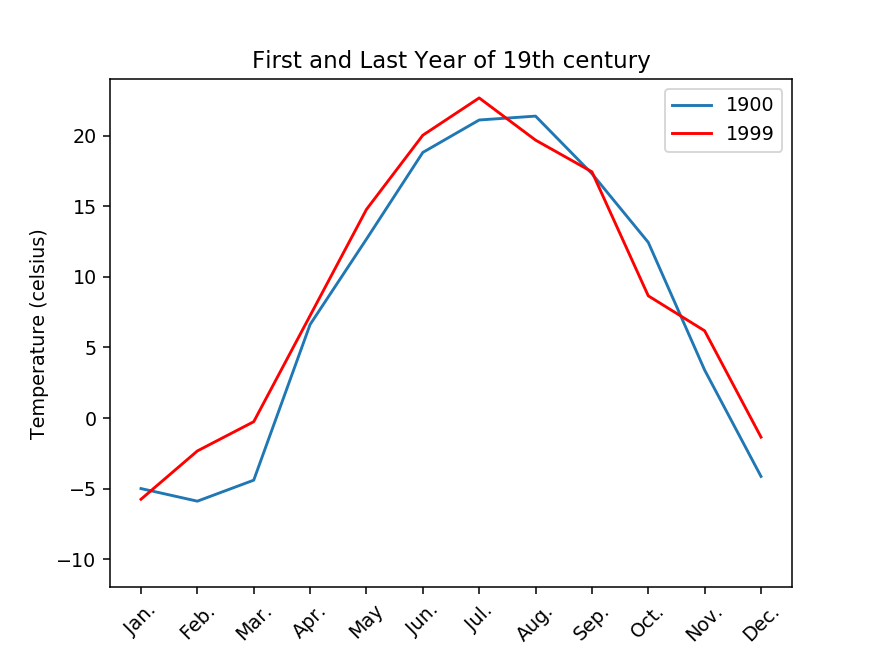

In [4]:
# scatter plot
x = np.arange(1,13,1)
months = ['Jan.', 'Feb.', 'Mar.', 'Apr.',
        'May', 'Jun.', 'Jul.', 'Aug.', 'Sep.','Oct.','Nov.','Dec.']

plt.figure()
plt.plot(x, NY[1900], label = '1900')
plt.plot(x, NY[1999], c='r', label = '1999')
plt.xticks(x, months, rotation = 45)
plt.gca().axes.set_ylabel('Temperature (celsius)')
plt.ylim(bottom = min_value, top = max_value) 
plt.gca().axes.set_title("First and Last Year of 19th century")
plt.legend()

In [6]:
NY['max'] = NY.max(axis=1)
NY['min'] = NY.min(axis=1)

NY['year_max'] = NY.idxmax(axis=1)
NY['year_min'] = NY.idxmin(axis=1)

NY['change']  = NY['max'] - NY['min'] 

summary = pd.concat([NY['max'], NY['year_max'],  NY['min'], NY['year_min'], NY['change']], axis=1)
summary


,max,year_max,min,year_min,change
Month,,,,,
1,0.571,1932,-11.785,1918,12.356
2,-0.516,1984,-12.826,1934,12.310
3,5.682,1946,-5.038,1916,10.720
4,10.119,1921,2.850,1943,7.269
5,16.549,1911,8.600,1917,7.949
6,20.879,1949,15.466,1926,5.413
7,23.528,1921,18.961,1992,4.567
8,22.234,1955,16.568,1903,5.666
9,19.411,1961,12.810,1918,6.601


<IPython.core.display.Javascript object>


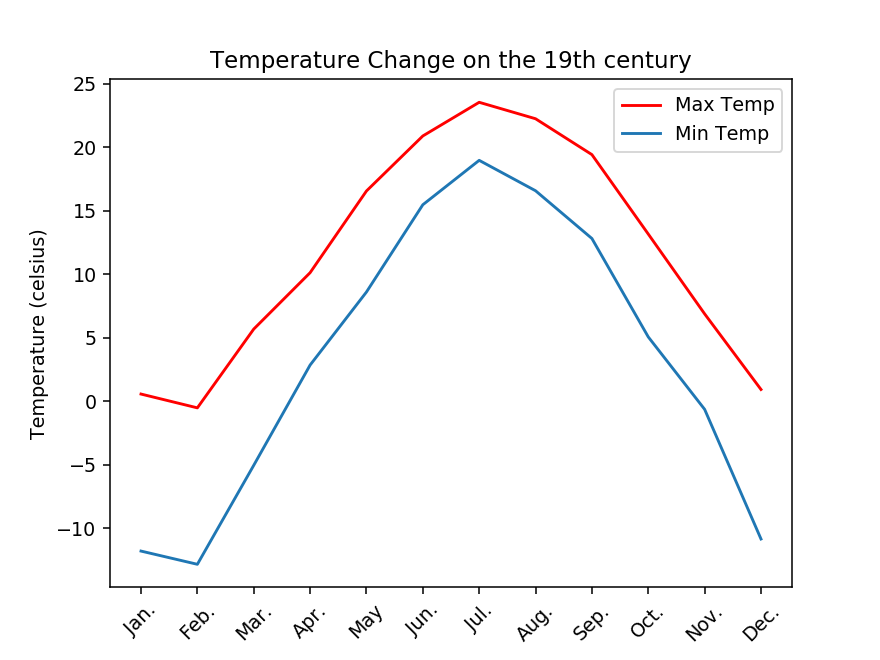

In [7]:

plt.figure()
plt.plot(x, summary['max'], c='r', label = 'Max Temp')
plt.plot(x, summary['min'], label = 'Min Temp')
plt.xticks(x, months, rotation = 45)
plt.gca().axes.set_ylabel('Temperature (celsius)')
plt.gca().axes.set_title("Temperature Change on the 19th century")
plt.legend()

An animated bar plot was made to see in details how temperatures change

In [8]:
n = 100

def update_plot(year):
    if year == 99:
        plt.cla()
        plt.plot(x, NY[1900], label = '1900')
        plt.plot(x, NY[1999], c='r', label = '1999')
        plt.legend(loc = 4)
        plt.gca().axes.set_title('The change of Temperatures during the century')
        a.event_source.stop()

    plt.cla()
    y = 1900 + year
    plt.bar([1,2], NY.loc[1:2,y], color = '#778beb')
    plt.bar([3,4,5], NY.loc[3:5,y], color = '#f78fb3')
    plt.bar([6,7,8], NY.loc[6:8,y], color = '#eb3b5a')
    plt.bar([9,10,11], NY.loc[9:11,y], color = '#e77f67')
    plt.bar([12], NY.loc[12,y], color = '#778beb')
    plt.xticks(x, months, rotation = 45)
    plt.ylim(bottom = min_value, top = max_value) 
    plt.gca().axes.set_ylabel('Temperature (celsius)')
    plt.gca().axes.set_title('Average Temperatures during ' + str(y))
    plt.legend(labels =['Winter', 'Spring', 'Summer', 'Autumn'], loc = 2)
    plt.annotate('n = {}'.format(year), [3,27])
    

<IPython.core.display.Javascript object>


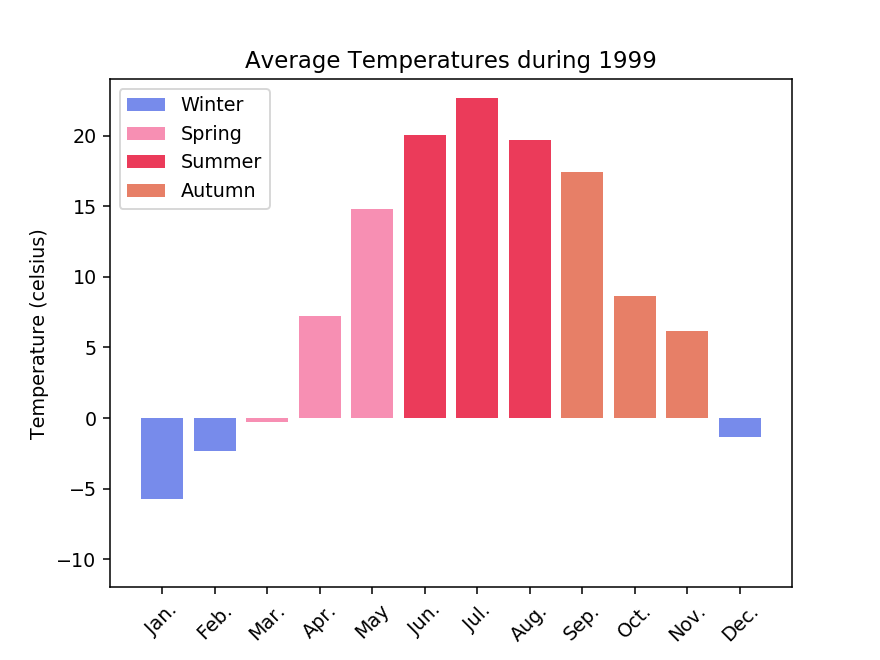

In [9]:
fig = plt.figure()
a = animation.FuncAnimation(fig, update_plot, interval=500)
a

### Conclusion

We can see that the temperatures were increased especially in the spring and summer
